# WSL Ranking

## Importação das bibliotecas básicas

In [376]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

## Obtenção dos dados

Os dados do primeiro trabalho representam o ranking do mundial de surf, como a base de dados é relativamente pequena, obtive também os dados dos 2 anos anteriores (com exceção ao ano de 2020, no qual o campeonato foi suspenso devido à pandemia) para tentar prever o placar da última rodada.
Algumas alterações no spyder facilitaram a obtenção dos dados: https://github.com/murosfc/wslCrawlerScrapy.git

In [377]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Os arquivos csv podem ser baixados em: https://drive.google.com/drive/folders/1lcxYXSQBR1-sm0ytSkZIRUQB6ybcob75?usp=sharing

In [378]:
df1 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/wsl/wsl2019.csv')
df2 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/wsl/wsl2021.csv')
df3 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/wsl/wsl2022.csv')

In [379]:
#mesclar os dataframes baseando nos nomes do atleta
#como apenas os atletas presentes no ranking de 2022 estão competindo, os atletas não presentes nele serão descartados
df = df3.merge(df1, on='name', how='left')
df = df.merge(df2, on='name', how='left')

## Visualização e Tratamento dos dados

In [380]:
#verificando o ranking dos atletas em anos anteriores. Como a referência é o ano de 2022, ele será colocada em primeiro.
df = df.rename(columns={'rank_x': 'rank 2022', 'rank_y': 'rank 2019', 'rank': 'rank 2021'})
grafico = px.scatter_matrix(df, dimensions=['rank 2022', 'rank 2019', 'rank 2021'])
grafico.show()

In [381]:
#o país não muda, com o merge as colunas foram duplicadas, assim excluiremos as excedentes
df = df.drop(['country', 'country_y'], axis=1)

In [382]:
#total_points é a soma dos pontos, podemos excluir estas colunas sem perder dados
df = df.drop(['total_points', 'total_points_y', 'total_points_x'], axis=1)

In [383]:
#da mesma maneira que em total_points rank se dá através da soma dos pontos, podemos excluir estas colunas sem perder dados, mantendo apenas o rank de 2022 que é o que queremos prever
df = df.drop(['rank 2019', 'rank 2021'], axis=1)

In [384]:
#o valor '-' representa 0 pontos na etapa, então faremos a devida subsituição
df = df.replace('-',0)

In [385]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24 entries, 0 to 23
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   rank 2022      24 non-null     int64 
 1   name           24 non-null     object
 2   country_x      24 non-null     object
 3   round 1-2022   24 non-null     int64 
 4   round 2-2022   24 non-null     int64 
 5   round 3-2022   24 non-null     int64 
 6   round 4-2022   24 non-null     int64 
 7   round 5-2022   24 non-null     int64 
 8   round 6-2022   24 non-null     int64 
 9   round 7-2022   24 non-null     int64 
 10  round 8-2022   24 non-null     int64 
 11  round 9-2022   24 non-null     int64 
 12  round 10-2022  24 non-null     int64 
 13  round 1-2019   14 non-null     object
 14  round 2-2019   14 non-null     object
 15  round 3-2019   14 non-null     object
 16  round 4-2019   14 non-null     object
 17  round 5-2019   14 non-null     object
 18  round 6-2019   14 non-null     o

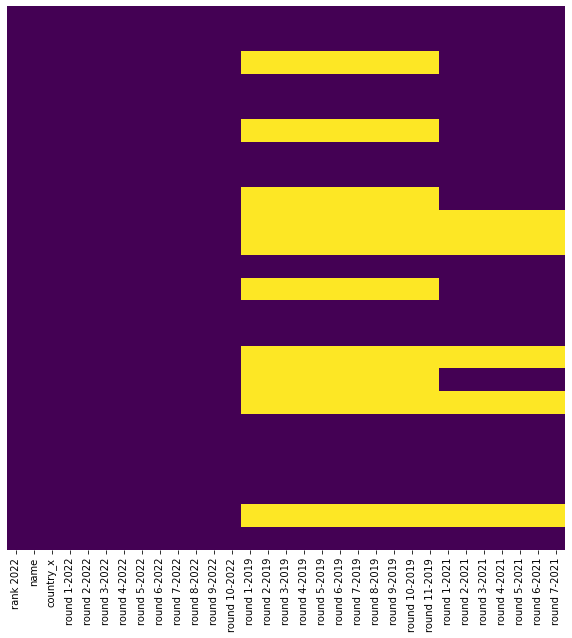

In [386]:
#verificando se há valores nulos
plt.figure(figsize=(10, 10))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [387]:
#Para impactar o mínimo possível na análise, utilizaremos a média do atleta para preencher os valores nulos em circuitos que não competiram. Isso geralmente acontece por lesão do atleta
for row in range (0,24):
  total2022 = 0 
  for column in range (3,31):  
    if column <= 12 and df.iloc[row, column] != "-":    
      total2022 += df.iloc[row, column]
    elif pd.isnull(df.iloc[row, column]):
      df.iloc[row, column] = total2022/10

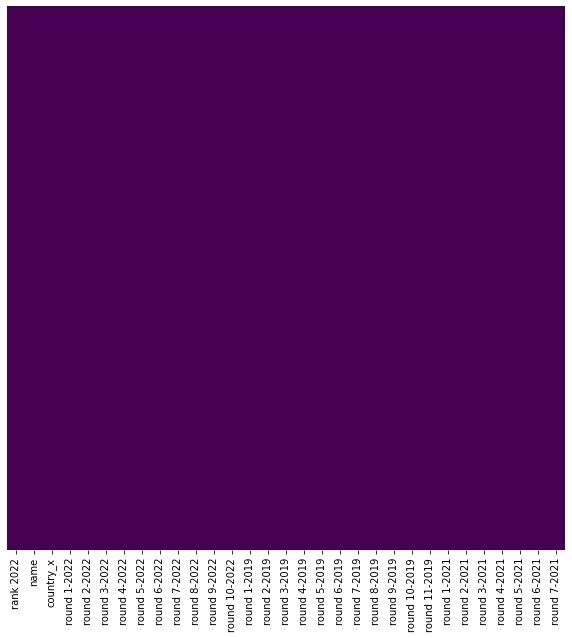

In [388]:
plt.figure(figsize=(10, 10))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [389]:
#converter os valores salvos como object em int
for i in range (3,31):
  df[df.columns[i]] = df[df.columns[i]].astype(int)

In [390]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24 entries, 0 to 23
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   rank 2022      24 non-null     int64 
 1   name           24 non-null     object
 2   country_x      24 non-null     object
 3   round 1-2022   24 non-null     int64 
 4   round 2-2022   24 non-null     int64 
 5   round 3-2022   24 non-null     int64 
 6   round 4-2022   24 non-null     int64 
 7   round 5-2022   24 non-null     int64 
 8   round 6-2022   24 non-null     int64 
 9   round 7-2022   24 non-null     int64 
 10  round 8-2022   24 non-null     int64 
 11  round 9-2022   24 non-null     int64 
 12  round 10-2022  24 non-null     int64 
 13  round 1-2019   24 non-null     int64 
 14  round 2-2019   24 non-null     int64 
 15  round 3-2019   24 non-null     int64 
 16  round 4-2019   24 non-null     int64 
 17  round 5-2019   24 non-null     int64 
 18  round 6-2019   24 non-null     i

In [391]:
#reorganizando colunas conforme ordem cronológica
cols = ['name',
 'country_x',
 'rank 2022',
 'round 1-2019',
 'round 2-2019',
 'round 3-2019',
 'round 4-2019',
 'round 5-2019',
 'round 6-2019',
 'round 7-2019',
 'round 8-2019',
 'round 9-2019',
 'round 10-2019',
 'round 11-2019',
 'round 1-2021',
 'round 2-2021',
 'round 3-2021',
 'round 4-2021',
 'round 5-2021',
 'round 6-2021',
 'round 7-2021',
 'round 1-2022',
 'round 2-2022',
 'round 3-2022',
 'round 4-2022',
 'round 5-2022',
 'round 6-2022',
 'round 7-2022',
 'round 8-2022',
 'round 9-2022',
 'round 10-2022']
df = df.reindex(columns=cols)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24 entries, 0 to 23
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           24 non-null     object
 1   country_x      24 non-null     object
 2   rank 2022      24 non-null     int64 
 3   round 1-2019   24 non-null     int64 
 4   round 2-2019   24 non-null     int64 
 5   round 3-2019   24 non-null     int64 
 6   round 4-2019   24 non-null     int64 
 7   round 5-2019   24 non-null     int64 
 8   round 6-2019   24 non-null     int64 
 9   round 7-2019   24 non-null     int64 
 10  round 8-2019   24 non-null     int64 
 11  round 9-2019   24 non-null     int64 
 12  round 10-2019  24 non-null     int64 
 13  round 11-2019  24 non-null     int64 
 14  round 1-2021   24 non-null     int64 
 15  round 2-2021   24 non-null     int64 
 16  round 3-2021   24 non-null     int64 
 17  round 4-2021   24 non-null     int64 
 18  round 5-2021   24 non-null     i

In [392]:
df.describe()

,rank 2022,round 1-2019,round 2-2019,round 3-2019,round 4-2019,round 5-2019,round 6-2019,round 7-2019,round 8-2019,round 9-2019,...,round 1-2022,round 2-2022,round 3-2022,round 4-2022,round 5-2022,round 6-2022,round 7-2022,round 8-2022,round 9-2022,round 10-2022
count,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.00000,24.000000,24.000000,...,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000
mean,12.458333,3486.291667,3436.291667,2902.958333,3619.000000,3480.666667,3305.458333,3130.87500,3376.916667,2713.791667,...,3065.416667,3231.250000,3231.250000,3021.041667,3456.458333,3506.666667,3589.583333,3281.458333,3589.583333,3177.708333
std,7.083227,2390.322818,2277.990561,2125.102483,2096.956013,2223.243394,2400.987460,1908.45914,2260.903435,1717.197388,...,2538.054680,2481.285278,2481.285278,2578.700372,2426.828526,2311.694121,2265.452693,2373.774961,2265.452693,2137.855477
min,1.000000,0.000000,0.000000,0.000000,1330.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,265.000000,265.000000,265.000000,265.000000,265.000000,1330.000000,1330.000000,1330.000000,1330.000000,1330.000000
25%,6.750000,2381.750000,1927.000000,1330.000000,2381.750000,1927.000000,1330.000000,1330.00000,1927.000000,1330.000000,...,1330.000000,1330.000000,1330.000000,1330.000000,1330.000000,1330.000000,1330.000000,1330.000000,1330.000000,1330.000000
50%,12.500000,3320.000000,3320.000000,2566.500000,3320.000000,3320.000000,3195.500000,3195.50000,3320.000000,2932.500000,...,2325.000000,3320.000000,3320.000000,2325.000000,3320.000000,3320.000000,3320.000000,3320.000000,3320.000000,3320.000000
75%,18.250000,4607.750000,4607.750000,3623.500000,4607.750000,4607.750000,4174.250000,4174.25000,4174.250000,3456.000000,...,4745.000000,4745.000000,4745.000000,4745.000000,4745.000000,4745.000000,4745.000000,4745.000000,4745.000000,3676.250000
max,24.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,7800.00000,10000.000000,7800.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000


## Divisão entre previsores e classe

In [393]:
df.columns

Index(['name', 'country_x', 'rank 2022', 'round 1-2019', 'round 2-2019',
       'round 3-2019', 'round 4-2019', 'round 5-2019', 'round 6-2019',
       'round 7-2019', 'round 8-2019', 'round 9-2019', 'round 10-2019',
       'round 11-2019', 'round 1-2021', 'round 2-2021', 'round 3-2021',
       'round 4-2021', 'round 5-2021', 'round 6-2021', 'round 7-2021',
       'round 1-2022', 'round 2-2022', 'round 3-2022', 'round 4-2022',
       'round 5-2022', 'round 6-2022', 'round 7-2022', 'round 8-2022',
       'round 9-2022', 'round 10-2022'],
      dtype='object')

In [394]:
X = df.iloc[:, 3:31].values #resultados de todas as etapas dos 3 últimos campeonatos

In [395]:
X[0]

array([ 3320,  7800,  4745,  1330, 10000,  6085,  3320,  7800,  1330,
        4745,  1330,  1330,  6085,  3320, 10000,  1330, 10000,  1330,
        3320,  3320,  7800, 10000,  3320,  7800,  7800, 10000,  3320,
        1330])

In [396]:
#utilizaremos a média dos resultados por atleta como referência para o y
df['media'] = df.iloc[:, 3:31].mean(axis=1)
df['media'] = df['media'].astype(int) #convertemos os valores para int para manter o padrão
y = df.iloc[:, 31].values 


In [397]:
y

array([5114, 2746, 4069, 5088, 3904, 3630, 3430, 2831, 2939, 3456, 3456,
       3277, 2800, 3828, 2941, 2794, 2047, 2467, 2566, 2855, 1843, 2460,
       2126, 4574])

## Divisão das bases em treinamento e teste


In [398]:
X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [399]:
X_treinamento.shape, y_treinamento.shape

((19, 28), (19,))

In [400]:
X_teste.shape, y_teste.shape

((5, 28), (5,))

## Random Forest Classifier 

In [401]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_digits
from sklearn.preprocessing import scale
%matplotlib inline

### Classificador

In [402]:
clf = RandomForestClassifier(n_estimators  = 100)

In [403]:
clf = clf.fit(X, y)

In [404]:
scores = clf.score(X,y)
print (scores) 

1.0


### Extraindo a importância

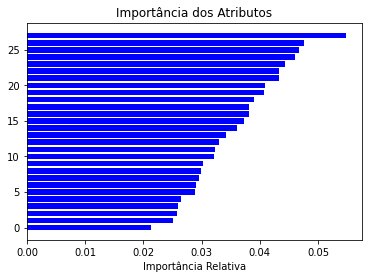

In [405]:
importances = clf.feature_importances_
indices = np.argsort(importances)
plt.figure(1)
plt.title('Importância dos Atributos')
plt.barh(range(len(indices)), importances[indices], color = 'b', align = 'center')
plt.xlabel('Importância Relativa')
plt.show()

## Random Forest Regressor

In [406]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
%matplotlib inline

In [407]:
reg = RandomForestRegressor(n_estimators = 1000, min_samples_leaf = 1, random_state = 101)
modelo = reg.fit(X_treinamento, y_treinamento)

In [408]:
previsoes = modelo.predict(X_teste)

In [409]:
mean_squared_error(previsoes, y_teste)

302966.52580639994

##Apresentação dos resultados baseado em previsões com o Modelo Treinado

In [415]:
print("Utilizando Random Forest")
for i in range(24):
  novaPrevisao = modelo.predict([X[i]])
  text = "Eu estimo que o atleta " + df['name'].iloc[i] + ", na última etapa fará a pontuação de:"
  print(text,  int(novaPrevisao[0]))

Utilizando Random Forest
Eu estimo que o atleta Filipe Toledo, na última etapa fará a pontuação de: 4702
Eu estimo que o atleta Jack Robinson, na última etapa fará a pontuação de: 2773
Eu estimo que o atleta Ethan Ewing, na última etapa fará a pontuação de: 3894
Eu estimo que o atleta Italo Ferreira, na última etapa fará a pontuação de: 4611
Eu estimo que o atleta Kanoa Igarashi, na última etapa fará a pontuação de: 3644
Eu estimo que o atleta Miguel Pupo, na última etapa fará a pontuação de: 3650
Eu estimo que o atleta Griffin Colapinto, na última etapa fará a pontuação de: 3359
Eu estimo que o atleta Caio Ibelli, na última etapa fará a pontuação de: 2880
Eu estimo que o atleta Connor O'Leary, na última etapa fará a pontuação de: 3100
Eu estimo que o atleta Callum Robson, na última etapa fará a pontuação de: 3405
Eu estimo que o atleta Samuel Pupo, na última etapa fará a pontuação de: 3346
Eu estimo que o atleta John John Florence, na última etapa fará a pontuação de: 3644
Eu estimo q

In [411]:
#Somando o valor da previsão e criando um novo dataframe com o ranking final
rank_final = []
rank_df = pd.DataFrame(rank_final)
rank_df['atleta'] = rank_final
rank_df['total_pontos'] = rank_final
for row in range (0,24):
  total2022 = 0 
  for column in range (21,32):        
    total2022 += df.iloc[row, column]
  novaPrevisao = modelo.predict([X[row]])
  rank_df.loc[len(rank_df.index)] = [df.iloc[row, 0], total2022]    

In [412]:
print ("Previsão do Ranking final para 2022")
rank_df.sort_values(by=['total_pontos'], ascending=False)

Previsão do Ranking final para 2022


,atleta,total_pontos
0,Filipe Toledo,63124.0
1,Jack Robinson,55421.0
2,Ethan Ewing,49689.0
3,Italo Ferreira,46878.0
4,Kanoa Igarashi,45504.0
6,Griffin Colapinto,44880.0
5,Miguel Pupo,44080.0
7,Caio Ibelli,38356.0
9,Callum Robson,38016.0
10,Samuel Pupo,38016.0


# Análise variação do câmbio do dólar

Como o resultado da análise dos dados do Ranking da WSL não foram como esperado, fiz uma segunda análise para atestar melhor os conhecimentos até agora obtidos.

## Importação das bibliotecas básicas

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

## Obtenção dos dados


Dados disponíveis em: https://br.investing.com/currencies/usd-brl-historical-data

Vamos prever o volume de dólar negociado conforme as variações da cotação para os dias que não possuem este dado na base de dados

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

O arquivo csv pode ser baixado em: https://drive.google.com/drive/folders/1lcxYXSQBR1-sm0ytSkZIRUQB6ybcob75?usp=sharing

In [329]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/wsl/USD_BRL Dados Históricos.csv')

## Análise, visualização e tratamento dos dados

In [330]:
df.head(10)

,Data,Último,Abertura,Máxima,Mínima,Vol.,Var%
0,13 de set. de 2022,"5,1911","5,0918","5,2092","5,0766","177,68K","1,93%"
1,12 de set. de 2022,"5,0930","5,1477","5,1477","5,0834","126,68K","-1,06%"
2,09 de set. de 2022,"5,1477","5,2143","5,2146","5,1378","151,12K","-1,27%"
3,08 de set. de 2022,"5,2141","5,2483","5,2523","5,1783","195,76K","-0,65%"
4,07 de set. de 2022,"5,2480","5,2507","5,2507","5,2483","34,56K","-0,09%"
5,06 de set. de 2022,"5,2528","5,1547","5,2539","5,1532","134,86K","1,96%"
6,05 de set. de 2022,"5,1516","5,1660","5,1905","5,1495","93,71K","-0,32%"
7,02 de set. de 2022,"5,1681","5,2422","5,2422","5,1575","153,53K","-1,40%"
8,01 de set. de 2022,"5,2416","5,1833","5,2577","5,1462","169,57K","1,13%"
9,31 de ago. de 2022,"5,1831","5,1229","5,2122","5,1229","158,17K","1,19%"


In [331]:
df.info() #todos os dados estão como objeto, precisamos tratá-los

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1227 entries, 0 to 1226
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Data      1227 non-null   object
 1   Último    1227 non-null   object
 2   Abertura  1227 non-null   object
 3   Máxima    1227 non-null   object
 4   Mínima    1227 non-null   object
 5   Vol.      939 non-null    object
 6   Var%      1227 non-null   object
dtypes: object(7)
memory usage: 67.2+ KB


In [332]:
#convertendo datas string para date. Primeiro precisamos modificar a data para um padrão conhecido ex: dd-mm-aa
#aproveitaremos o loop para mudar o mes para ingles, o decimal de , para ponto
for index, row in df.iterrows():
  row[0] = row[0].replace(' de ','-')
  row[0] = row[0].replace('.','')
  row[0] = row[0].replace('fev','feb')
  row[0] = row[0].replace('abr','apr')
  row[0] = row[0].replace('mai','may')
  row[0] = row[0].replace('ago','aug')
  row[0] = row[0].replace('set','sep')
  row[0] = row[0].replace('out','oct')
  row[0] = row[0].replace('dez','dec')
  #separador de decimais
  row[1] = row[1].replace(',','.')
  row[2] = row[2].replace(',','.')
  row[3] = row[3].replace(',','.')
  row[4] = row[4].replace(',','.')
  #para o volume vamos retirar o K para depois multiplicar por 1000 como temos valores nulos nesta coluna, precisamos checar antes
  if not pd.isna(row[5]):
    row[5] = row[5].replace(',','.')
    row[5] = row[5].replace('K','')
  #para varição, dividiremos por 100 para obter o decimal
  row[6] = row[6].replace(',','.')
  row[6] = row[6].replace('%','')

In [333]:
#converter a string tratada no formato date
df["Data"] = pd.to_datetime(df["Data"])

In [334]:
#convertendo os objetos em float
df["Último"] = pd.to_numeric(df["Último"])
df["Abertura"] = pd.to_numeric(df["Abertura"])
df["Máxima"] = pd.to_numeric(df["Máxima"])
df["Mínima"] = pd.to_numeric(df["Mínima"])
df["Vol."] = pd.to_numeric(df["Vol."])
df["Var%"] = pd.to_numeric(df["Var%"])

In [335]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1227 entries, 0 to 1226
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Data      1227 non-null   datetime64[ns]
 1   Último    1227 non-null   float64       
 2   Abertura  1227 non-null   float64       
 3   Máxima    1227 non-null   float64       
 4   Mínima    1227 non-null   float64       
 5   Vol.      939 non-null    float64       
 6   Var%      1227 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 67.2 KB


In [336]:
#ajustar os valores do volume e da variação
df["Vol."] = df["Vol."]*1000
df["Var%"] = df["Var%"]/100

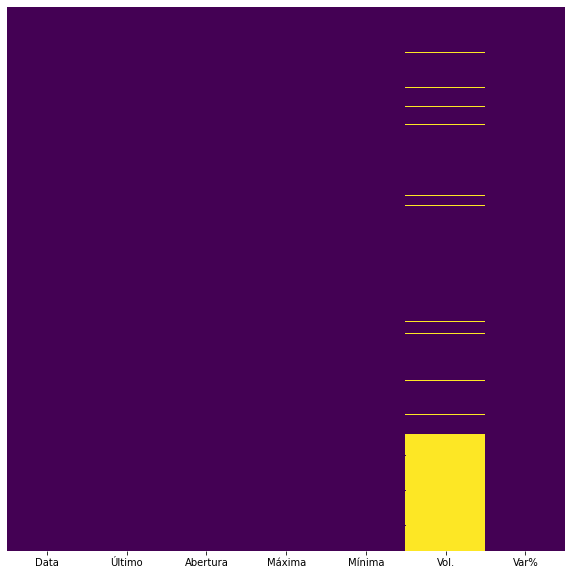

In [337]:
plt.figure(figsize=(10, 10))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
#Vamos separar os valores nullos em novo dataframe para prever estes valores

In [338]:
df.describe()
#utilizamos o describe identificamos uma inconsistência no volume com o mínimo de 0

,Último,Abertura,Máxima,Mínima,Vol.,Var%
count,1227.000000,1227.000000,1227.000000,1227.000000,939.000000,1227.000000
mean,4.624859,4.623483,4.659458,4.589073,93133.226837,0.000421
std,0.781911,0.782946,0.792660,0.771836,41520.215031,0.010491
min,3.146500,3.146400,3.148500,3.119500,0.000000,-0.050800
25%,3.877300,3.878750,3.901650,3.848450,61045.000000,-0.006000
50%,4.898800,4.879700,4.949000,4.838000,88430.000000,0.000300
75%,5.330150,5.325200,5.375200,5.278150,121575.000000,0.006600
max,5.885600,5.924800,5.971800,5.817600,225650.000000,0.037300


In [339]:
df.loc[df['Vol.'] < 10000] 

,Data,Último,Abertura,Máxima,Mínima,Vol.,Var%
107,2022-04-15,4.6965,4.6971,4.6971,4.6970,10.0,-0.0010
141,2022-02-28,5.1599,5.1638,5.1654,5.1600,20.0,-0.0005
187,2021-12-24,5.6750,5.6753,5.6753,5.6753,0.0,0.0000
216,2021-11-15,5.4575,5.4570,5.4580,5.4570,10.0,-0.0002
240,2021-10-12,5.5325,5.5370,5.5372,5.5328,10.0,-0.0008
333,2021-06-03,5.0775,5.0786,5.0786,5.0780,20.0,0.0004
364,2021-04-21,5.5690,5.5692,5.5695,5.5692,0.0,0.0001
410,2021-02-16,5.3695,5.3685,5.3707,5.3685,0.0,-0.0001
588,2020-06-11,4.9760,4.9740,4.9765,4.9740,0.0,0.0006
625,2020-04-21,5.3163,5.3172,5.3176,5.3166,10.0,-0.0001


In [340]:
#vamos colocar os valores inconsistentes iguais a nulo para tratar junto com estes
df.loc[df['Vol.'] < 10000] = np.nan
df.loc[df['Vol.'] < 10000] 

,Data,Último,Abertura,Máxima,Mínima,Vol.,Var%


In [341]:
df.isna().sum() 

Data         20
Último       20
Abertura     20
Máxima       20
Mínima       20
Vol.        308
Var%         20
dtype: int64

In [342]:
#20 linha são nulas em todas as colunas, vamos remove-las
df = df.dropna(how='all')

In [343]:
#vamos separar as linhas com o volume null antes de excluir as linhas
samples = df[df['Vol.'].isna()]
samples

,Data,Último,Abertura,Máxima,Mínima,Vol.,Var%
63,2022-06-16,5.0535,5.0538,5.0551,5.0538,NaN,0.0000
103,2022-04-21,4.6220,4.6224,4.6225,4.6224,NaN,0.0000
140,2022-03-01,5.1595,5.1605,5.1605,5.1605,NaN,-0.0001
182,2021-12-31,5.5703,5.5715,5.5717,5.5711,NaN,-0.0001
225,2021-11-02,5.6795,5.6849,5.6849,5.6800,NaN,-0.0004
...,...,...,...,...,...,...,...
1222,2018-01-05,3.2291,3.2348,3.2493,3.2263,NaN,-0.0017
1223,2018-01-04,3.2347,3.2374,3.2428,3.2214,NaN,-0.0007
1224,2018-01-03,3.2370,3.2590,3.2680,3.2311,NaN,-0.0068
1225,2018-01-02,3.2591,3.3136,3.3136,3.2570,NaN,-0.0161


In [344]:
#por fim excluir as linhas nulas
df = df.dropna()
df.isna().sum()

Data        0
Último      0
Abertura    0
Máxima      0
Mínima      0
Vol.        0
Var%        0
dtype: int64

In [345]:
#convertendo o volume para int, não trabalharemos com decimais pois o valor é arrendondado
df["Vol."] = (df["Vol."]).astype(int)

In [346]:
#últimas análises
grafico = px.scatter_matrix(df, dimensions=['Último', 'Abertura', 'Máxima', 'Mínima', 'Vol.', 'Var%'])
grafico.show()

In [347]:
df.describe()

,Último,Abertura,Máxima,Mínima,Vol.,Var%
count,919.000000,919.000000,919.000000,919.000000,919.000000,919.000000
mean,4.891708,4.890559,4.930971,4.851568,95159.363439,0.000376
std,0.653659,0.654664,0.664120,0.643381,39604.732945,0.010975
min,3.644000,3.645500,3.682200,3.635800,12530.000000,-0.032500
25%,4.163650,4.164450,4.184200,4.141200,63200.000000,-0.006700
50%,5.158100,5.159200,5.205000,5.113600,89930.000000,0.000400
75%,5.393850,5.404200,5.449050,5.351700,122145.000000,0.006900
max,5.885600,5.924800,5.971800,5.817600,225650.000000,0.037300


## Divisão entre previsores e classe

In [348]:
df.columns.tolist() #colocar a coluna Vol. por último

['Data', 'Último', 'Abertura', 'Máxima', 'Mínima', 'Vol.', 'Var%']

In [349]:
df = df[['Data', 'Último', 'Abertura', 'Máxima', 'Mínima', 'Var%', 'Vol.']]
df.columns.tolist()

['Data', 'Último', 'Abertura', 'Máxima', 'Mínima', 'Var%', 'Vol.']

In [350]:
X = df.iloc[:, 1:6].values 

In [351]:
# Escalonamento de valores de X
from sklearn.preprocessing import StandardScaler
scaler_wsl = StandardScaler()
X = scaler_wsl.fit_transform(X)

In [352]:
X[0]

array([0.4582744 , 0.30756307, 0.41917168, 0.34995428, 1.72518787])

In [353]:
y = df.iloc[:, 6].values 

In [354]:
y[0:10]

array([177680, 126680, 151120, 195760,  34560, 134860,  93710, 153530,
       169570, 158170])

## Divisão das bases em treinamento e teste


In [355]:
X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(X, y, test_size = 0.25, random_state = 101)

In [356]:
X_treinamento.shape, y_treinamento.shape

((689, 5), (689,))

In [357]:
X_teste.shape, y_teste.shape

((230, 5), (230,))

## Random Forest Classifier 

In [358]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_digits
from sklearn.preprocessing import scale
%matplotlib inline

### Classificador

In [359]:
clf = RandomForestClassifier(n_estimators  = 10)

In [360]:
#clf.fit estava apresentando: ValueError: Unknown label type: 'continuous'. Pois y é um array 2D, vamos converter para 1D
y = np.asarray(df['Vol.'], dtype="|S6")

In [361]:
clf = clf.fit(X, y)

In [362]:
scores = clf.score(X,y)
print (scores) 

0.9923830250272034


### Extraindo a importância

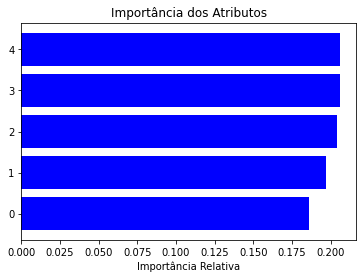

In [363]:
importances = clf.feature_importances_
indices = np.argsort(importances)
plt.figure(1)
plt.title('Importância dos Atributos')
plt.barh(range(len(indices)), importances[indices], color = 'b', align = 'center')
plt.xlabel('Importância Relativa')
plt.show()

## Random Forest Regressor

In [364]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
%matplotlib inline

In [365]:
reg = RandomForestRegressor(n_estimators = 1000, min_samples_leaf = 1, random_state = 101)
modelo = reg.fit(X_treinamento, y_treinamento)

In [366]:
previsoes = modelo.predict(X_teste)

In [367]:
mean_squared_error(previsoes, y_teste)

930527066.1637563

##Apresentação dos resultados

Aqui faremos algo diferente, vamos utilizar as previsões para preencher o com previsões o dataframe que separamos anteriormente cujo valor para o volume era nulo

####Tratamento da base de exemplos

In [368]:
samples.columns.tolist() #colocar a coluna Vol. por último

['Data', 'Último', 'Abertura', 'Máxima', 'Mínima', 'Vol.', 'Var%']

In [369]:
samples = samples[['Data', 'Último', 'Abertura', 'Máxima', 'Mínima', 'Var%', 'Vol.']]
df.columns.tolist()

['Data', 'Último', 'Abertura', 'Máxima', 'Mínima', 'Var%', 'Vol.']

In [370]:
X_samples = samples.iloc[:, 1:6].values 
X_samples[0]

array([5.0535, 5.0538, 5.0551, 5.0538, 0.    ])

In [371]:
# Escalonamento de valores de X
from sklearn.preprocessing import StandardScaler
scaler_usd = StandardScaler()
X_samples = scaler_usd.fit_transform(X_samples)
X_samples.shape

(288, 5)

In [372]:
samples.shape

(288, 7)

In [373]:
#reiniciando os indices do dataframe samples para iterar sobre as linhas
samples = samples.reset_index()
samples = samples.drop('index', axis=1) #apagando a coluna index criada com os índices antigos
samples

,Data,Último,Abertura,Máxima,Mínima,Var%,Vol.
0,2022-06-16,5.0535,5.0538,5.0551,5.0538,0.0000,NaN
1,2022-04-21,4.6220,4.6224,4.6225,4.6224,0.0000,NaN
2,2022-03-01,5.1595,5.1605,5.1605,5.1605,-0.0001,NaN
3,2021-12-31,5.5703,5.5715,5.5717,5.5711,-0.0001,NaN
4,2021-11-02,5.6795,5.6849,5.6849,5.6800,-0.0004,NaN
...,...,...,...,...,...,...,...
283,2018-01-05,3.2291,3.2348,3.2493,3.2263,-0.0017,NaN
284,2018-01-04,3.2347,3.2374,3.2428,3.2214,-0.0007,NaN
285,2018-01-03,3.2370,3.2590,3.2680,3.2311,-0.0068,NaN
286,2018-01-02,3.2591,3.3136,3.3136,3.2570,-0.0161,NaN


In [374]:
for i, row in samples.iterrows():  
  samples.loc[i,'Vol.'] = int(modelo.predict([X_samples[i]])[0])

In [375]:
#dataframe samples que possuía a coluna de Volume com valores nulos agora preenchidos com dados previstos baseado no valores de X da linha correspondente
samples 

,Data,Último,Abertura,Máxima,Mínima,Var%,Vol.
0,2022-06-16,5.0535,5.0538,5.0551,5.0538,0.0000,115092.0
1,2022-04-21,4.6220,4.6224,4.6225,4.6224,0.0000,115092.0
2,2022-03-01,5.1595,5.1605,5.1605,5.1605,-0.0001,115054.0
3,2021-12-31,5.5703,5.5715,5.5717,5.5711,-0.0001,115054.0
4,2021-11-02,5.6795,5.6849,5.6849,5.6800,-0.0004,116452.0
...,...,...,...,...,...,...,...
283,2018-01-05,3.2291,3.2348,3.2493,3.2263,-0.0017,47712.0
284,2018-01-04,3.2347,3.2374,3.2428,3.2214,-0.0007,47335.0
285,2018-01-03,3.2370,3.2590,3.2680,3.2311,-0.0068,44353.0
286,2018-01-02,3.2591,3.3136,3.3136,3.2570,-0.0161,50614.0
